# 数据读取和预处理

## 加载csv/excel数据集

<table class="table my-4 w-full"><thead><tr><th>Variable Name</th><th>Role</th><th>Type</th><th>Description</th><th>Units</th><th>Missing Values</th></tr></thead> <tbody><tr><td>sepal length</td><td>Feature</td><td>Continuous</td><td></td><td>cm</td><td>no</td> </tr><tr><td>sepal width</td><td>Feature</td><td>Continuous</td><td></td><td>cm</td><td>no</td> </tr><tr><td>petal length</td><td>Feature</td><td>Continuous</td><td></td><td>cm</td><td>no</td> </tr><tr><td>petal width</td><td>Feature</td><td>Continuous</td><td></td><td>cm</td><td>no</td> </tr><tr><td>class</td><td>Target</td><td>Categorical</td><td>class of iris plant: Iris Setosa, Iris Versicolour, or Iris Virginica</td><td></td><td>no</td> </tr></tbody></table>

从UCI网站，下载Iris公开数据集，包含iris.data和iris.names两个文件。一个为数据文件，一个为描述文件。放到上级目录的data文件夹下（../data)

In [1]:
# 用pandas初步查看数据文件

import torch
import pandas as pd
import matplotlib.pyplot as plt
import os

df=pd.read_csv("../data/iris.data", header = None) # 如果是excel，则使用pd.read_excel()
print(df.head())

X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
set(y)

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

定制Dataset类

In [11]:
# %load iris.py
import os
import pandas as pd
from torch.utils.data import Dataset

class IrisDataset(Dataset):
    def __init__(self, file_path='../data/iris.data', header=None, transform=None, 
                 target_transform=None ):

        df=pd.read_csv(file_path, header = header)
       
        self.X=torch.tensor(df.iloc[:,:-1].values)
        label_ids = [['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'].index(x) for x in df.iloc[:,-1].values] # map string label to int
        self.y=torch.tensor(label_ids)

        self.transform = transform
        self.target_transform = target_transform

        # print(self.X)
        # print(self.y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        """
        Args:
            idx (int): Index
        """
        x = self.X[idx]
        label = self.y[idx]
        # print(idx, x, label)
        if self.transform:
            x = self.transform(x)
        if self.target_transform:
            label = self.target_transform(label)
        return x, label

    def __desc__(self):
        '''
        额外增加一个方法，返回数据集的说明
        '''
        with open('../data/iris.names') as f:
            lines = f.readlines()
            desc = ''
            for l in lines:
                desc+=l
            return desc

In [3]:
from torch.utils.data import DataLoader

dataset = IrisDataset()
print(dataset.__desc__())

1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results:
         -- very low misclassification rates (0% for t

In [4]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True, drop_last=False)

xs, labels = next(iter(dataloader))

print('打印一个batch的数据: ')
print(xs)
print(labels)

打印一个batch的数据: 
tensor([[5.7000, 4.4000, 1.5000, 0.4000],
        [6.7000, 3.3000, 5.7000, 2.1000],
        [6.8000, 3.0000, 5.5000, 2.1000],
        [5.7000, 2.8000, 4.1000, 1.3000],
        [6.3000, 2.5000, 5.0000, 1.9000],
        [5.7000, 3.0000, 4.2000, 1.2000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [6.1000, 2.8000, 4.0000, 1.3000],
        [5.4000, 3.4000, 1.5000, 0.4000],
        [6.7000, 3.1000, 4.7000, 1.5000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [6.2000, 3.4000, 5.4000, 2.3000],
        [5.0000, 3.5000, 1.6000, 0.6000],
        [6.2000, 2.9000, 4.3000, 1.3000],
        [6.0000, 2.2000, 4.0000, 1.0000]], dtype=torch.float64)
tensor([0, 2, 2, 1, 2, 1, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1])


In [5]:
DATA_DIR = '../data/fruit/柿子/'
print(os.listdir(DATA_DIR))

['中度腐烂', '新鲜', '次新鲜', '轻度腐烂', '重度腐烂']


## 加载图片

从目录中加载。目录结构

    '../data/fruit/西梅/': 
        |-- 中度腐烂
        |-- 新鲜
        |-- 次新鲜
        |-- 轻度腐烂
        |-- 重度腐烂

In [6]:
import torch
from torchvision import datasets, transforms

data_transform = transforms.Compose([
        # # 数据增强，随机裁剪224*224大小 # transforms.RandomResizedCrop(224),    
        transforms.Resize((224,224)),
        # transforms.RandomRotation(45), # -45 ~ 45
        # transforms.CenterCrop(224),
        # # 数据增强，随机水平翻转
        # transforms.RandomHorizontalFlip(),
        # 数据变成tensor类型，像素值归一化，调整维度[h,w,c]==>[c,h,w]
        transforms.ToTensor(),
        # # 对每个通道的像素进行标准化，给出每个通道的均值和方差。特别是使用了预训练权重时，需要符合该模型的预处理参数
        # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

dataset = datasets.ImageFolder('../data/fruit/西梅/', transform=data_transform)
dataloader = DataLoader(dataset=dataset,  
                              batch_size=16,
                              shuffle=True)

In [7]:
print(dir(dataset)) # 查看有哪些感兴趣的方法/属性
dataset.classes 

['__add__', '__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_format_transform_repr', '_repr_indent', 'class_to_idx', 'classes', 'extensions', 'extra_repr', 'find_classes', 'imgs', 'loader', 'make_dataset', 'root', 'samples', 'target_transform', 'targets', 'transform', 'transforms']


['中度腐烂', '新鲜', '次新鲜', '轻度腐烂', '重度腐烂']

Optional: split into training and test set

或者使用`train_set, test_set = torch.utils.data.random_split(dataset, [345, 116])`

In [8]:
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset

def train_test_dataset(dataset, test_split=0.25):
    train_idx, test_idx = train_test_split(list(range(len(dataset))), test_size=test_split)
    return Subset(dataset, train_idx), Subset(dataset, test_idx)
    
train_dataset,test_dataset = train_test_dataset(dataset)

print(len(dataset), ' samples are split into ', len(train_dataset), ' and', len(test_dataset), ' samples.')

train_dataloader = DataLoader(dataset=train_dataset,  
                              batch_size=16,
                              shuffle=True)

461  samples are split into  345  and 116  samples.


torch.Size([16, 3, 224, 224]) torch.Size([16])


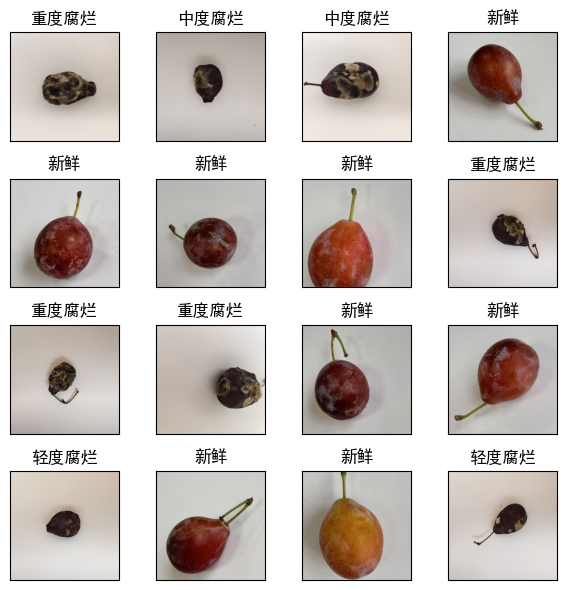

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 取出一个batch的训练集，返回图片及其标签
# 注意这里改用了Python的内置next函数来获取下一个迭代器的输出
train_img, train_label = next(iter(train_dataloader))

# 查看shape, img=[32,3,224,224], label=[32]
print(train_img.shape, train_label.shape)

# 从一个batch中取出前N张图片
img = train_img[:16]  # [16, 3, 224, 224]
# 将图片反标准化，像素变到0-1之间

# tensor类型变成numpy类型
img = img.cpu().numpy()
class_label = train_label.cpu().numpy()

# 维度重排 [b,c,h,w]==>[b,h,w,c]
img = np.transpose(img, [0,2,3,1])

MEAN = torch.tensor([0.485, 0.456, 0.406])
STD = torch.tensor([0.229, 0.224, 0.225])

# 创建画板
plt.rcParams['font.sans-serif'] = ['Simhei']  #显示中文
plt.figure(figsize = (6,6))
for i in range(img.shape[0]):
    plt.subplot(4,4,i+1)
    # restored_img = img[i] * STD[:, None, None] + MEAN[:, None, None] # 根据预处理反向恢复
    plt.imshow(img[i])
    plt.xticks([])  # 不显示x轴刻度
    plt.yticks([])  # 不显示y轴刻度
    plt.title(dataset.classes[class_label[i]])  # 图片对应的类别

plt.tight_layout()
plt.show()

## 其他预处理

图片批量修改尺寸

批量重命名文件

批量resize + rename